참고
https://darkpgmr.tistory.com/53

## Cascade Face Recognition

- Haar Cascade Classifier
- Harr-like 특징을 기반으로 함 
- adaboost (adaptive boosting)을 통해 분류기를 훈련한다.
Cascade는 여러 개의 단순한 분류기(weak classifiers)를 연결한 것. 이미지는 여러 단계의 분류기를 거치게 되며, 각 단계에서 얼굴이 아닌 것으로 판단되면, 즉시 다음 영역으로 넘어간다. 이렇게 하여 계산 시간을 줄이고, 탐지 정확도를 높인다.

- haar cascade `.xml` 파일 url

https://github.com/opencv/opencv/tree/master/data/haarcascades

### Full body (보행자 검출)

In [48]:
import cv2

body_cascade = cv2.CascadeClassifier('./data/haarcascade_fullbody.xml')

cap = cv2.VideoCapture('./data/walking.avi')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    bodies = body_cascade.detectMultiScale(gray, 1.1, 3)

    for (x, y, w, h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    cv2.imshow('Frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

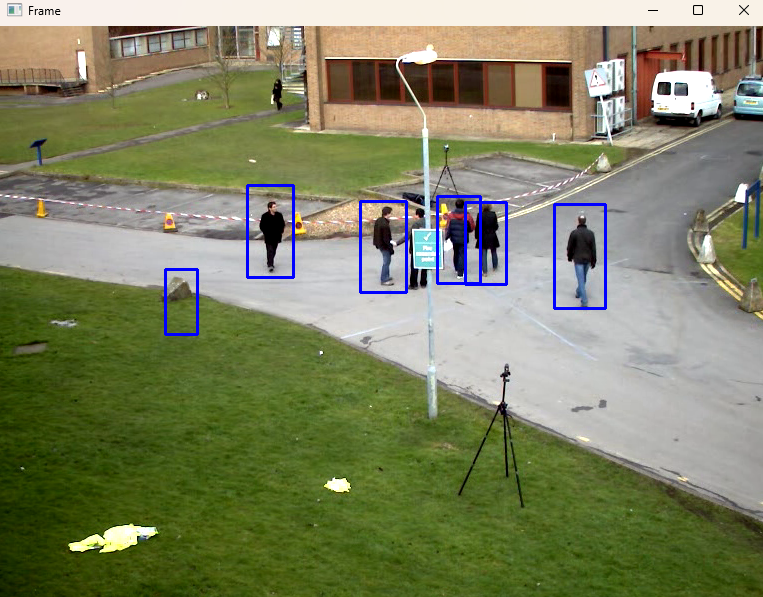

### Face 검출

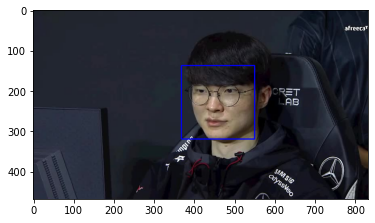

In [57]:
import matplotlib.pyplot as plt
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')

img = cv2.imread("./data/faker.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.5, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### eyes 검출 

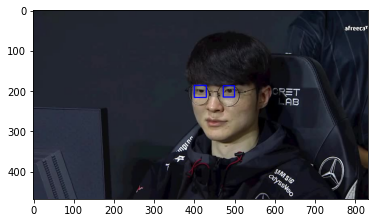

In [67]:
eyes_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

img = cv2.imread("./data/faker.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyes_cascade.detectMultiScale(gray, 1.1, 5)

for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## MediaPipe

- 그래프 기반 프레임워크 
- 얼굴 인식, 얼굴 메쉬, 눈동자 추적, 손 추적, 포즈 추적, 홀리스틱 모델, 헤어 세그멘테이션, 객체 감지, 상자 추적, 즉각적인 모션 추적, Objectron, KNIFT 등 다양한 ML 솔루션을 제공 

### 얼굴 감지(face detection)

In [ ]:
# import cv2
# import mediapipe as mp

# mp_face_detection = mp.solutions.face_detection
# mp_drawing = mp.solutions.drawing_utils

# # 웹캠에서 이미지 캡처
# cap = cv2.VideoCapture(0)

# with mp_face_detection.FaceDetection(
#     model_selection=0, min_detection_confidence=0.5) as face_detection:

#     while cap.isOpened():
#         success, image = cap.read()
#         if not success:
#             continue

#         # BGR 이미지를 RGB로 변환
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#         # 얼굴 감지 수행
#         results = face_detection.process(image)

#         # RGB 이미지를 BGR로 변환하여 표시
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#         if results.detections:
#             for detection in results.detections:
#                 mp_drawing.draw_detection(image, detection)

#         cv2.imshow('Face Detection', image)
#         if cv2.waitKey(5) & 0xFF == 27:
#             break

# cap.release()

In [6]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

image = cv2.imread("./ssh.jpg")

with mp_face_detection.FaceDetection(
    model_selection=0, min_detection_confidence=0.5) as face_detection:

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_detection.process(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.detections:
            for detection in results.detections:
                mp_drawing.draw_detection(image, detection)

        
    cv2.imshow('Face Detection', image)

cv2.waitKey(0)
cv2.destroyAllWindows()

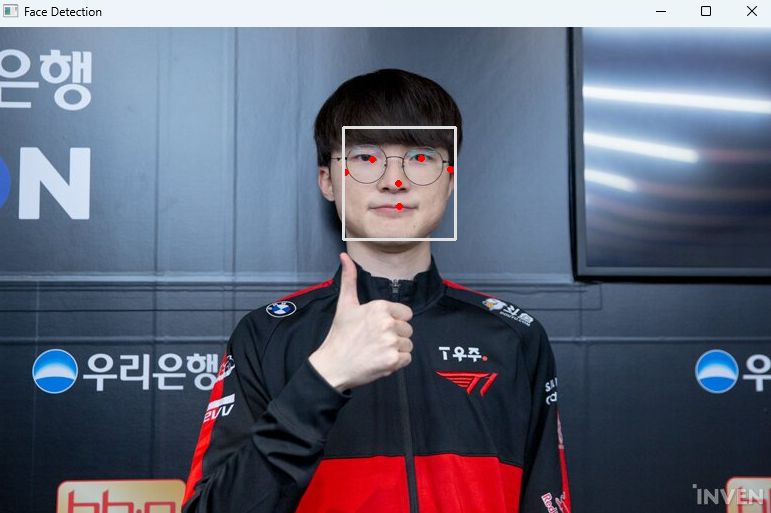

### 손 감지(hand detection) 

In [2]:
# import cv2
# import mediapipe as mp

# mp_hands = mp.solutions.hands
# mp_drawing = mp.solutions.drawing_utils

# cap = cv2.VideoCapture(0)

# with mp_hands.Hands(
#     min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:

#     while cap.isOpened():
#         success, image = cap.read()
#         if not success:
#             continue

#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         results = hands.process(image)

#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#         if results.multi_hand_landmarks:
#             for hand_landmarks in results.multi_hand_landmarks:
#                 mp_drawing.draw_landmarks(
#                     image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

#         cv2.imshow('Hand Tracking', image)
#         if cv2.waitKey(5) & 0xFF == 27:
#             break

# cap.release()
# cv2.destroyAllWindows()

In [5]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

image = cv2.imread("./ssh.jpg")

with mp_hands.Hands(
    min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        
    cv2.imshow('Hand Tracking', image)

cv2.waitKey(0)
cv2.destroyAllWindows()

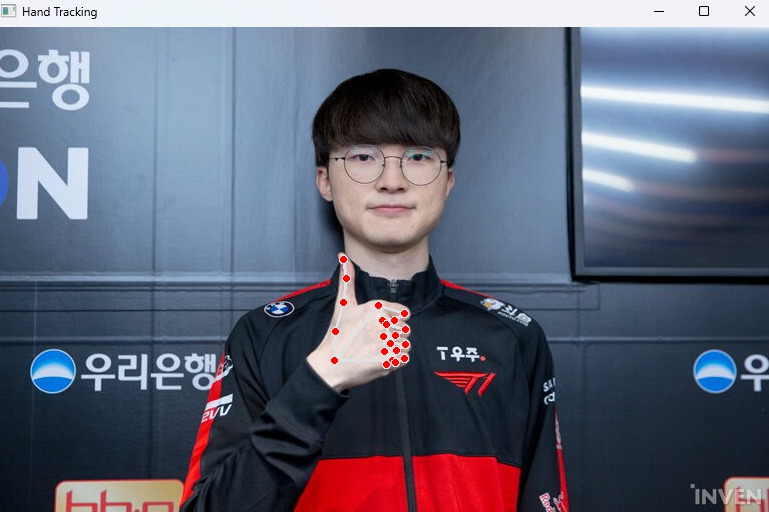

### 포즈 추정 (pose estimation)

In [ ]:
# import cv2
# import mediapipe as mp

# mp_pose = mp.solutions.pose
# mp_drawing = mp.solutions.drawing_utils

# cap = cv2.VideoCapture(0)

# with mp_pose.Pose(
#     min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

#     while cap.isOpened():
#         success, image = cap.read()
#         if not success:
#             continue

#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         results = pose.process(image)

#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#         if results.pose_landmarks:
#             mp_drawing.draw_landmarks(
#                 image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

#         cv2.imshow('Pose Estimation', image)
#         if cv2.waitKey(5) & 0xFF == 27:
#             break

# cap.release()

In [9]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

image = cv2.imread("./ssh.jpg")


with mp_pose.Pose(
    min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)
        
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, 
                                  mp_pose.POSE_CONNECTIONS)
    
    cv2.imshow('Pose Estimation', image)

cv2.waitKey(0)
cv2.destroyAllWindows()
    

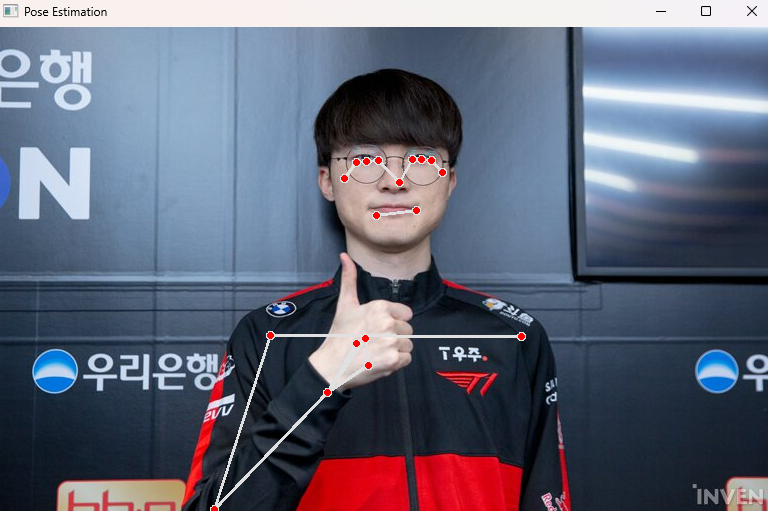

### Objectron (3D 객체 인식)

In [1]:
import cv2
import mediapipe as mp

mp_objectron = mp.solutions.objectron
mp_drawing = mp.solutions.drawing_utils

# 카메라 설정
cap = cv2.VideoCapture(0)

# Objectron 설정
with mp_objectron.Objectron(static_image_mode=False,
                            max_num_objects=1,
                            min_detection_confidence=0.5,
                            min_tracking_confidence=0.99,
                            model_name='Shoe') as objectron:

    while cap.isOpened():
        success, image = cap.read()
        if not success:
            continue

        # 이미지 처리
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = objectron.process(image)

        # 결과 표시
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.detected_objects:
            for detected_object in results.detected_objects:
                mp_drawing.draw_landmarks(
                    image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
                mp_drawing.draw_axis(image, detected_object.rotation, detected_object.translation)

        cv2.imshow('Objectron', image)
        if cv2.waitKey(5) & 0xFF == 27:
            break

cap.release()
cv2.destroyAllWindows()


## HOG

In [17]:
import cv2

# HOG 보행자 검출기 초기화
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 비디오 캡처 초기화
cap = cv2.VideoCapture('./data/walking.avi')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 보행자 검출
    boxes, weights = hog.detectMultiScale(frame, winStride=(8, 8))

    # 검출된 보행자에 사각형 그리기
    for (x, y, w, h) in boxes:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow('Frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

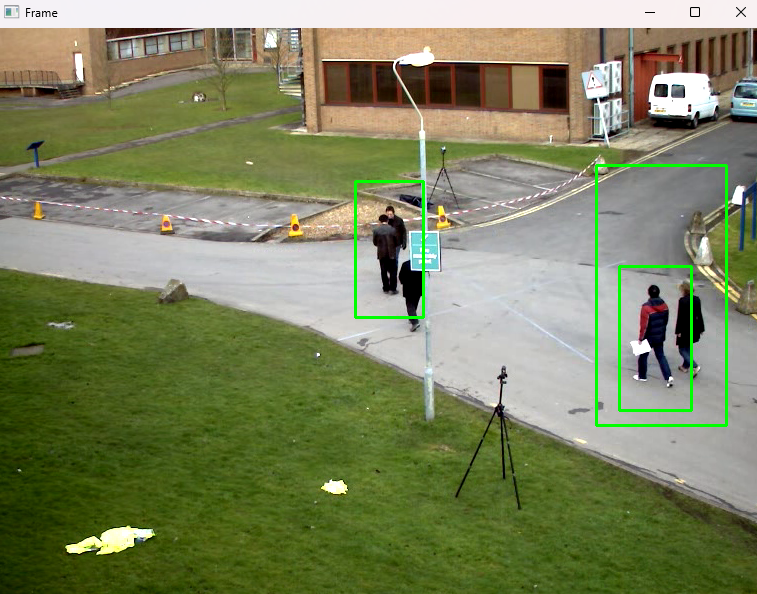

## MobileNet + SSD

In [57]:
import cv2
import matplotlib.pyplot as plt


face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')

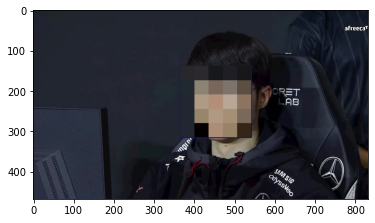

In [58]:
img = cv2.imread("./data/faker.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y : y + h, x : x + w]
    roi_color = img[y : y + h, x : x + w]
    # Shrinking and then enlarging the image to create the mosaic effect
    roi = cv2.resize(roi_color, (5, 5), interpolation=cv2.INTER_LINEAR)
    roi = cv2.resize(roi, (w, h), interpolation=cv2.INTER_NEAREST)

    img[y:y+h, x:x+w] = roi  # Applying the mosaic on the original image

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [62]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

In [28]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

Found 1 faces.


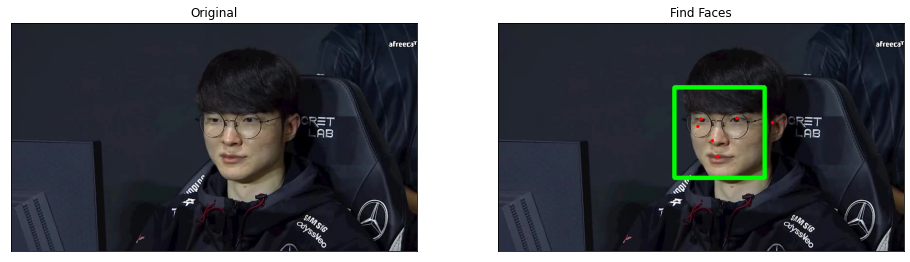

In [65]:
img = cv2.imread("./data/faker.jpg")

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # Draw face detections of each face.
    if not results.detections:
        print("Face not found in img")
    else:
        print('Found {} faces.'.format(len(results.detections)))
        
        annotated_img = img.copy()
        
        for detection in results.detections:
            # print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
            mp_drawing.draw_detection(annotated_img, detection, bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=7))
            
        plt_imshow(["Original", "Find Faces"], [img, annotated_img], figsize=(16,10))

Found 5 faces.


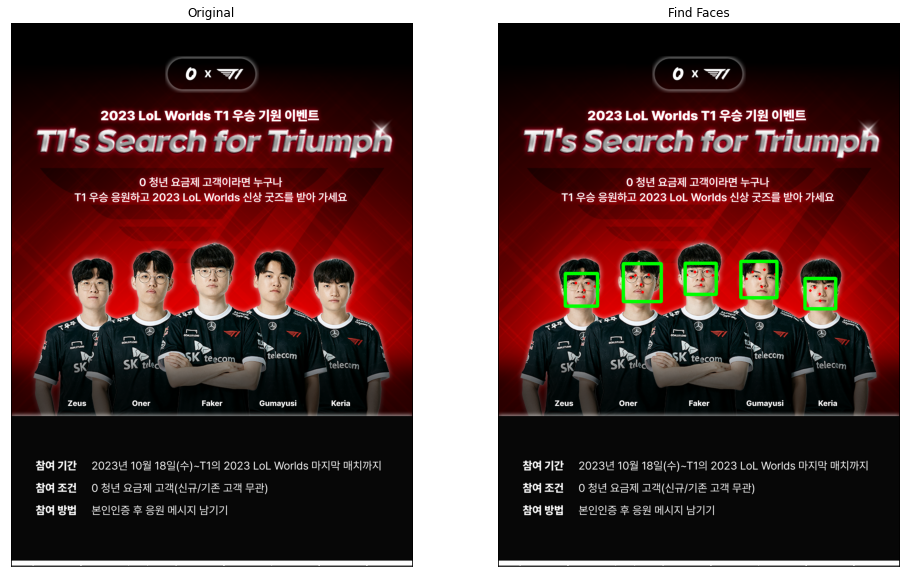

In [113]:
img = cv2.imread("t1.png")

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # Draw face detections of each face.
    if not results.detections:
        print("Face not found in img")
    else:
        print('Found {} faces.'.format(len(results.detections)))
        
        annotated_img = img.copy()
        
        for detection in results.detections:
            # print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
            mp_drawing.draw_detection(annotated_img, detection, bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=7))
            
        plt_imshow(["Original", "Find Faces"], [img, annotated_img], figsize=(16,10))

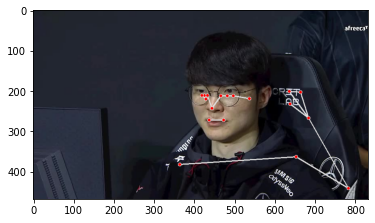

In [78]:
img = cv2.imread("./data/faker.jpg")
# MediaPipe pose 솔루션 초기화
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# MediaPipe 그리기 유틸리티 초기화
mp_drawing = mp.solutions.drawing_utils

# BGR 이미지를 RGB로 변환
rgb_img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Pose 인식 수행
results = pose.process(rgb_img)

# 랜드마크 그리기
if results.pose_landmarks:
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# 결과 표시
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 얼굴 잡고 블러처리 

In [18]:
import cv2
import mediapipe as mp

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# 카메라 캡쳐 객체 생성
cap = cv2.VideoCapture(0)

with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        # BGR 이미지를 RGB로 변환
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # 얼굴 탐지 수행
        results = face_detection.process(image)

        # 이미지에 얼굴 블러 처리
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, ic = image.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                ROI = image[y:y+h, x:x+w]
                blur = cv2.GaussianBlur(ROI, (99, 99), 0)
                image[y:y+h, x:x+w] = blur

        # 결과 표시
        cv2.imshow('MediaPipe Face Detection', image)
        if cv2.waitKey(5) & 0xFF == 27:
            break

cap.release()
cv2.destroyAllWindows()


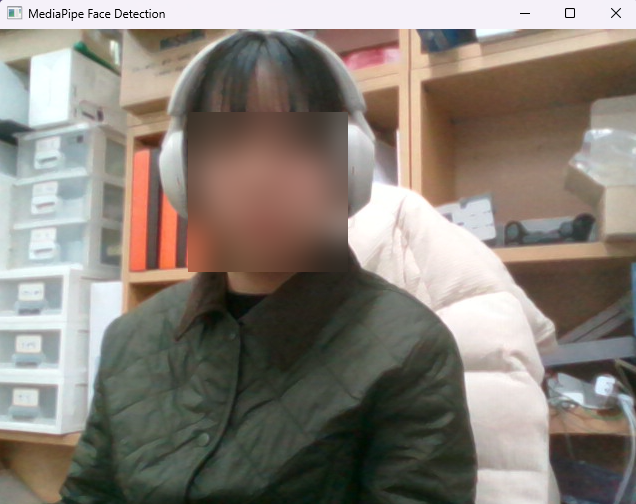

In [6]:
import mediapipe as mp
import cv2

# MediaPipe pose 솔루션 초기화
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# MediaPipe 그리기 유틸리티 초기화
mp_drawing = mp.solutions.drawing_utils

# 이미지 또는 비디오 프레임 캡처
cap = cv2.VideoCapture(0)  

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # BGR 이미지를 RGB로 변환
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Pose 인식 수행
    results = pose.process(rgb_frame)

    # 랜드마크 그리기
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # 결과 표시ㅂ
    cv2.imshow("MediaPipe Pose", frame)

    # 'q'를 눌러 종료
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [85]:
import dlib
import cv2

# Dlib의 HOG 기반 얼굴 검출기 초기화
detector = dlib.get_frontal_face_detector()

# 이미지 또는 비디오 프레임 캡처
cap = cv2.VideoCapture("./data/walking.avi")  # 웹캠에서 비디오 캡처

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # 얼굴 검출
    faces = detector(frame)

    # 각 얼굴에 대한 바운딩 박스 그리기
    for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # 결과 표시
    cv2.imshow("Dlib Face Detection", frame)

    # 'q'를 눌러 종료
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [115]:
# import cv2
# import numpy as np

# img = cv2.imread("./t1.png")


# # HOG Descriptor 초기화
# hog = cv2.HOGDescriptor()
# # 사전 학습된 사람 검출기 설정
# hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# # 이미지 또는 비디오 프레임 캡처
# # 사람 검출 수행
# boxes, weights = hog.detectMultiScale(img, winStride=(7, 7))

# # 검출된 사람에 대한 바운딩 박스 그리기
# for (x, y, w, h) in boxes:
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# # 결과 표시
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

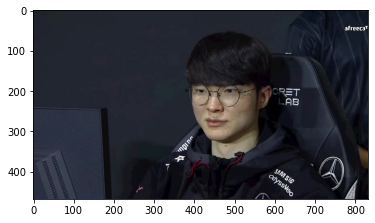

In [97]:
# MobileNet-SSD 모델 불러오기
img = cv2.imread("./data/faker.jpg")


net = cv2.dnn.readNetFromCaffe('./data/MobileNetSSD_deploy.prototxt', './data/MobileNetSSD_deploy.caffemodel')

# 비디오 캡처 객체 초기화
cap = cv2.VideoCapture("./data/walking.avi")


blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 0.007843, (300, 300), 127.5)
net.setInput(blob)
detections = net.forward()

# 탐지된 객체들을 반복
for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # 최소 확신도 이상일 때만 처리
    if confidence > 0.2:
        idx = int(detections[0, 0, i, 1])
        # 클래스 ID가 사람(1)인 경우에만 처리
        if idx == 1:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # 바운딩 박스를 이미지에 그리기
            cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)

# 결과 표시
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [100]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()
        
        
prototxt_path = './data/model/MobileNetSSD_deploy.prototxt.txt'
model_path = './data/model/MobileNetSSD_deploy.caffemodel'
 
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)


CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", 
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]
 
LABEL_COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

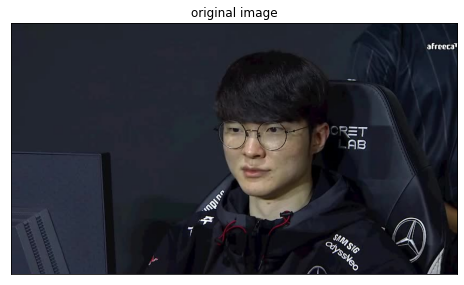

In [101]:
img = cv2.imread("./data/faker.jpg")
img_show('original image', img)

In [109]:
import time
start = time.time()

(h, w) = img.shape[:2]
resized = cv2.resize(img, (300, 300))
blob = cv2.dnn.blobFromImage(resized, 0.007843, (300, 300), 127.5)
 
net.setInput(blob)
detections = net.forward()

vis = img.copy()
conf = 0.2


# 추출된 영역을 반복 수행 confidence 값이 임계치를 넘는 경우만 표시
for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
 
    if confidence > conf:
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        
        print("[INFO] {} : [ {:.2f} % ]".format(CLASSES[idx], confidence * 100))
        
        cv2.rectangle(vis, (startX, startY), (endX, endY), LABEL_COLORS[idx], 1)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(vis, "{} : {:.2f}%".format(CLASSES[idx], confidence * 100), (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, LABEL_COLORS[idx], 2)
        

print(f"Processing Time : {time.time() - start:.2f}")
img_show('Object Detection', vis, figsize=(16,10))

[INFO] person : [ 96.55 % ]
Processing Time : 0.03


[INFO] person : [ 92.76 % ]
[INFO] person : [ 80.75 % ]
[INFO] person : [ 63.50 % ]
[INFO] person : [ 58.27 % ]
[INFO] person : [ 46.52 % ]
Processing Time : 0.09


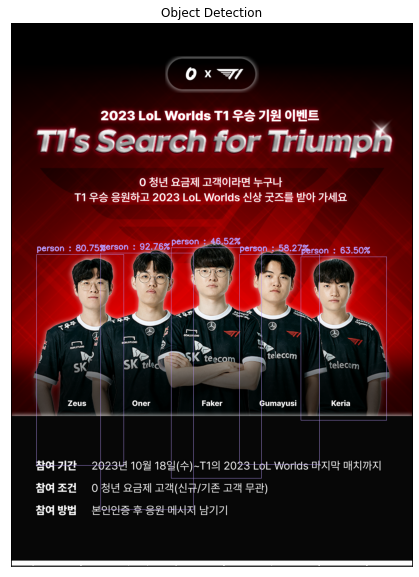

In [112]:
img = cv2.imread("t1.png")

(h, w) = img.shape[:2]
resized = cv2.resize(img, (300, 300))
blob = cv2.dnn.blobFromImage(resized, 0.007843, (300, 300), 127.5)
 
net.setInput(blob)
detections = net.forward()

vis = img.copy()
conf = 0.2

for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
 
    if confidence > conf:
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        
        print("[INFO] {} : [ {:.2f} % ]".format(CLASSES[idx], confidence * 100))
        
        cv2.rectangle(vis, (startX, startY), (endX, endY), LABEL_COLORS[idx], 1)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(vis, "{} : {:.2f}%".format(CLASSES[idx], confidence * 100), (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, LABEL_COLORS[idx], 2)
        

img_show('Object Detection', vis, figsize=(16,10))

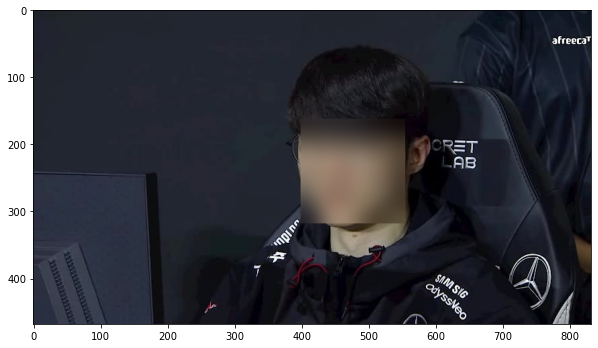

In [26]:
# import cv2
# import mediapipe as mp
# import matplotlib.pyplot as plt

# mp_face_detection = mp.solutions.face_detection
# mp_drawing = mp.solutions.drawing_utils

# img = cv2.imread("./data/faker.jpg")

# with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.2) as face_detection:
#     # BGR 이미지를 RGB로 변환
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img.flags.writeable = False

#     # 얼굴 탐지 수행
#     results = face_detection.process(img)

#     # 이미지에 얼굴 블러 처리
#     img.flags.writeable = True
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#     if results.detections:
#         for detection in results.detections:
#             bboxC = detection.location_data.relative_bounding_box
#             ih, iw, ic = img.shape
#             x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
#             ROI = img[y:y+h, x:x+w]
#             blur = cv2.GaussianBlur(ROI, (99, 99), 0)
#             img[y:y+h, x:x+w] = blur

# plt.figure(figsize=(10, 10))
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


### facedetection parameter 
- model_selection=0 근거리 얼굴 인식(2m 이내)
- model_selection=1 원거리 얼굴 인식(2m 이상)

Found 4 faces.


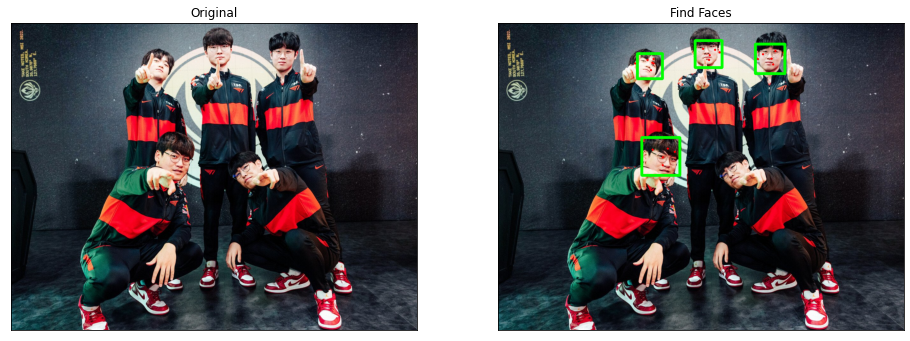

In [40]:
img = cv2.imread("t1.jpg")

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.4) as face_detection:
    results = face_detection.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # Draw face detections of each face.
    if not results.detections:
        print("Face not found in img")
    else:
        print('Found {} faces.'.format(len(results.detections)))
        
        annotated_img = img.copy()
        
        for detection in results.detections:
            # print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
            mp_drawing.draw_detection(annotated_img, detection, bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=7))
            
        plt_imshow(["Original", "Find Faces"], [img, annotated_img], figsize=(16,10))

In [17]:
import cv2
import mediapipe as mp
import numpy as np
import time

prototxt_path = './data/model/MobileNetSSD_deploy.prototxt.txt'
model_path = './data/model/MobileNetSSD_deploy.caffemodel'
 
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)


CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", 
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]
 
LABEL_COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

# 이미지 또는 비디오 프레임 캡처
cap = cv2.VideoCapture(0)  # 웹캠에서 비디오 캡처

while cap.isOpened() :
    ret, frame = cap.read()
    if not ret : 
        break
    start = time.time()
    (h, w) = frame.shape[:2]
    resized = cv2.resize(frame, (300, 300))
    blob = cv2.dnn.blobFromImage(resized, 0.007843, (300, 300), 127.5)

    net.setInput(blob)
    detections = net.forward()

    vis = frame.copy()
    conf = 0.2


    # 추출된 영역을 반복 수행 confidence 값이 임계치를 넘는 경우만 표시
    for i in np.arange(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        idx = int(detections[0, 0, i, 1])
        if CLASSES[idx] == "person" and confidence > conf:
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

#             print("[INFO] {} : [ {:.2f} % ]".format(CLASSES[idx], confidence * 100))

            cv2.rectangle(vis, (startX, startY), (endX, endY), LABEL_COLORS[idx], 1)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.putText(vis, "{} : {:.2f}%".format(CLASSES[idx], confidence * 100), (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, LABEL_COLORS[idx], 2)

    cv2.imshow("test", vis)
    key = cv2.waitKey(1)
#     print(f"Processing Time : {time.time() - start:.2f}")
    if key == ord('q') or key == 27:
        break

cap.release()
cv2.destroyAllWindows()

## MediaPipe + SSD / MobileNet

In [40]:
import cv2
import mediapipe as mp
import numpy as np
import time

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

prototxt_path = './data/model/MobileNetSSD_deploy.prototxt.txt'
model_path = './data/model/MobileNetSSD_deploy.caffemodel'
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", 
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]
    
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)
LABEL_COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

cap = cv2.VideoCapture('./interviews.mp4') 

with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
    while cap.isOpened() :
        ret, frame = cap.read()
        if not ret : 
            break
        start = time.time()
        (h, w) = frame.shape[:2]
        resized = cv2.resize(frame, (300, 300))
        blob = cv2.dnn.blobFromImage(resized, 0.007843, (300, 300), 127.5)

        net.setInput(blob)
        detections = net.forward()

        vis = frame.copy()
        conf = 0.2

        for i in np.arange(0, detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            idx = int(detections[0, 0, i, 1])
            if CLASSES[idx] == "person" and confidence > conf:
                idx = int(detections[0, 0, i, 1])
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")
                cv2.rectangle(vis, (startX, startY), (endX, endY), LABEL_COLORS[idx], 1)
                y = startY - 10 if startY - 10 > 10 else startY + 10
                cv2.putText(vis, "{} : {:.2f}%".format(CLASSES[idx], confidence * 100), (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, LABEL_COLORS[idx], 2)

        # BGR 이미지를 RGB로 변환
        image = cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # 얼굴 탐지 수행
        results = face_detection.process(image)

        # 이미지에 얼굴 블러 처리
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, ic = image.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                if y < 0 : 
                    y = 0
                if x < 0 :
                    x = 0
                ROI = image[y:y+h, x:x+w]
                blur = cv2.GaussianBlur(ROI, (99, 99), 0)
                image[y:y+h, x:x+w] = blur


        cv2.imshow("test", image)
        key = cv2.waitKey(1)
    #     print(f"Processing Time : {time.time() - start:.2f}")
        if key == ord('q') or key == 27:
            break

cap.release()
cv2.destroyAllWindows()

In [33]:
import cv2
import mediapipe as mp
import numpy as np
import time

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

prototxt_path = './data/model/MobileNetSSD_deploy.prototxt.txt'
model_path = './data/model/MobileNetSSD_deploy.caffemodel'
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", 
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]
    
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)
LABEL_COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

cap = cv2.VideoCapture(0) 

with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
    while cap.isOpened() :
        ret, frame = cap.read()
        if not ret : 
            break
        start = time.time()
        (h, w) = frame.shape[:2]
        resized = cv2.resize(frame, (300, 300))
        blob = cv2.dnn.blobFromImage(resized, 0.007843, (300, 300), 127.5)

        net.setInput(blob)
        detections = net.forward()

        vis = frame.copy()
        conf = 0.2

        for i in np.arange(0, detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            idx = int(detections[0, 0, i, 1])
            if CLASSES[idx] == "person" and confidence > conf:
                idx = int(detections[0, 0, i, 1])
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")
                cv2.rectangle(vis, (startX, startY), (endX, endY), LABEL_COLORS[idx], 1)
                y = startY - 10 if startY - 10 > 10 else startY + 10
                cv2.putText(vis, "{} : {:.2f}%".format(CLASSES[idx], confidence * 100), (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, LABEL_COLORS[idx], 2)

        image = cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = face_detection.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, ic = image.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                if y < 0 : 
                    y = 0
                if x < 0 :
                    x = 0
                ROI = image[y:y+h, x:x+w]
                blur = cv2.GaussianBlur(ROI, (99, 99), 0)
                image[y:y+h, x:x+w] = blur


        cv2.imshow("test", image)
        key = cv2.waitKey(1)
    #     print(f"Processing Time : {time.time() - start:.2f}")
        if key == ord('q') or key == 27:
            break

cap.release()
cv2.destroyAllWindows()

In [116]:
# import dlib
# import cv2

# # Dlib의 HOG 기반 얼굴 검출기를 초기화합니다.
# detector = dlib.get_frontal_face_detector()

# # 이미지 또는 비디오 프레임 캡처
# cap = cv2.VideoCapture(0)  # 웹캠에서 비디오 캡처

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         continue

#     # Dlib을 사용하여 프레임에서 얼굴을 검출합니다.
#     faces = detector(frame)

#     # 검출된 얼굴에 대한 바운딩 박스를 그립니다.
#     for face in faces:
#         x, y, w, h = face.left(), face.top(), face.width(), face.height()
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

#     # 결과를 화면에 표시합니다.
#     cv2.imshow("Dlib Face Detection", frame)

#     # 'q'를 눌러 종료합니다.
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

### 차량 번호판 인식 및 블러처리 

In [69]:
# from object_detection.utils import label_map_util, visualization_utils as viz_utils
# import tensorflow as tf
# import cv2
# import numpy as np
# import tensorflow as tf

# IMAGE = "./data/license_plate.jpg"#PATH TO IMAGE

# PBTXT = "./Mobilenet-SSD-to-detect-Licence-Plate-main/models/label_map.pbtxt"
# CONFIG ="./Mobilenet-SSD-to-detect-Licence-Plate-main/models/pipeline.config"
# MODEL = "./Mobilenet-SSD-to-detect-Licence-Plate-main/models/exported-models-V2/my_model/saved_model/saved_model.pb"

# detector = tf.saved_model.load(MODEL)
# category_index = label_map_util.create_category_index_from_labelmap(PBTXT, True)

ModuleNotFoundError: No module named 'object_detection'

In [ ]:
img = cv2.imread(IMAGE)
img_np = np.array(img)
detections = detector(np.expand_dims(img_np, 0))
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

height, width, channel = np.shape(img)
pl_height = int(height*0.1)
pl_width = int(width*0.1)

y1 = int(detections['detection_boxes'][0][0]*height)
x1 = int(detections['detection_boxes'][0][1]*width)
y2 = int(detections['detection_boxes'][0][2]*height)
x2 = int(detections['detection_boxes'][0][3]*width)


plate = img[y1:y2, x1:x2]
plate = cv2.resize(plate, (pl_width, pl_height))

image_np_with_detections = img_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes'],
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.1,
            agnostic_mode=False)

image_np_with_detections[int(height*0.05):int(height*0.05+pl_height), int(height*0.05):int(height*0.05+pl_width)] = plate

cv2.imshow("image", image_np_with_detections)
cv2.waitKey(0)